# Квадратурные формулы

$
f(x) = 2 cos(3.5x) exp({5x \over 3}) + 3 sin(1.5x) exp(−4x) + 3 ,
\\
a = 1.5, b = 2.3, α = 1/5, β = 0;
$

In [1]:
a = 1.5
b = 2.3
alpha = 1/5
beta = 0

In [2]:
def f(x):
    it1 = 2 * np.cos(3.5 * x) * np.exp(5/3 * x)
    it2 = 3 * np.sin(1.5 * x) * np.exp(-4 * x) + 3
    return it1 + it2

**Весовая функция**
$
p(x) = (x - a)^{-\alpha} (b - x)^{-\beta}
$

In [3]:
def p(x):
    it1 = (x - a)**(-alpha)
    it2 = (b - x)**(-beta)
    return it1 * it2

In [4]:
def px_func(x, j):
    return p(x) * (x**j)

In [5]:
import math
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
epsilon = 0.0001
X = np.linspace(a + epsilon, b - epsilon, 200)
Y_f = f(X)
Y_fp = f(X) * p(X)

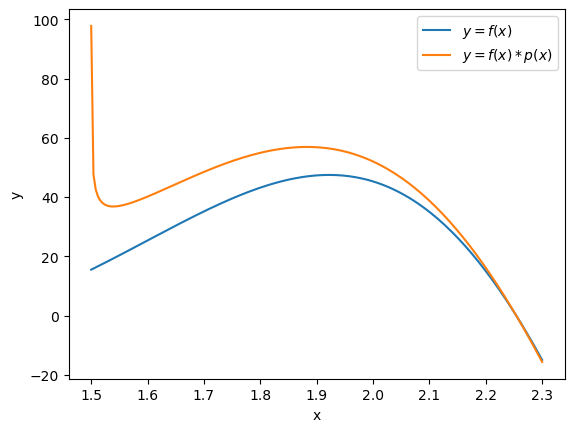

In [7]:
plt.plot(X, Y_f, label='$ y = f(x) $')
plt.plot(X, Y_fp, label='$ y = f(x) * p(x) $')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
None

In [8]:
def fp(x):
    return f(x) * p(x)

In [9]:
exact_value, exact_err_rate = quad(fp, a, b)
print('Точное значение интеграла:', exact_value)

Точное значение интеграла: 32.2195145288426


## Решение с помощью КФ. Метод Ньютона-Котса

Зададим узлы:

$
x_1 = a
\\
x_2 = {a + b \over 2}
\\
x_3 = b
$

#### Интерполяционная квадратурная формула

In [10]:
x1 = a
x2 = (a + b) / 2
x3 = b

Вычислим моменты:

In [11]:
n = 3
mu = [quad(px_func, a, b, args=(i))[0] for i in range(n)]
mu = np.array(mu)
mu

array([1.04563955, 1.94024228, 3.65924051])

$
A_j \ - \ коэффициенты
\\
x_j^s \ - \ матрица \ СЛАУ
\\
\mu_s \ - \ свободный \ вектор
\\
СЛАУ: \ x * A = s
$

In [12]:
x = [
    [x1**0, x2**0, x3**0],
    [x1**1, x2**1, x3**1],
    [x1**2, x2**2, x3**2],
]

x = np.array(x)
x

array([[1.  , 1.  , 1.  ],
       [1.5 , 1.9 , 2.3 ],
       [2.25, 3.61, 5.29]])

In [13]:
A = np.linalg.solve(x, mu)
A

array([0.2489618 , 0.66389813, 0.13277963])

In [14]:
sum(A * f(x[1]))

33.26484741283031

**Оценка методической погрешности**

$
R_n (f) = J(f) - \sum_{j=1}^{n}{A_j f(x_j)}
$

In [15]:
res = abs(exact_value - sum(A * f(x[1])))
print('Методическая погрешность:', res)
print('Погрешность "точного" метода:', exact_err_rate)

Методическая погрешность: 1.0453328839877116
Погрешность "точного" метода: 1.8411583369015716e-10


## Составная квадратурная формула

In [30]:
def calculate_for(ma, mb):
    # задаем точки
    x1 = ma
    x2 = (ma + mb) / 2
    x3 = mb
    
    # вычисляем моменты
    n = 3
    mu = [quad(px_func, ma, mb, args=(i))[0] for i in range(n)]
    mu = np.array(mu)
    
    # решаем СЛАУ
    x = [
        [x1**0, x2**0, x3**0],
        [x1**1, x2**1, x3**1],
        [x1**2, x2**2, x3**2],
    ]

    x = np.array(x)
    A = np.linalg.solve(x, mu)

    # результат
    return sum(A * f(x[1]))


def skf(count):
    res = 0
    h = (b - a) / count
    
    for i in range(count):
        ma, mb = a + i*h, a + (i + 1)*h
        res += calculate_for(ma, mb)
    
    return res


def skf_h(h):
    res = 0
    count = math.ceil((b - a) / h)
    
    for i in range(count):
        ma, mb = a + i*h, a + (i + 1)*h
        res += calculate_for(ma, mb)
    
    return res

In [17]:
errors = []
actual = quad(fp, a, b)[0]

for i in [i for i in range(1, 10)]:    
    res = skf(i)
    
    err = abs(actual - res)
    errors.append(err)
    print(f'i: {i:3}; Result: {res:.4f}; Погрешность: {err:.9f}')

i:   1; Result: 33.2648; Погрешность: 1.045332884
i:   2; Result: 32.3006; Погрешность: 0.081076921
i:   3; Result: 32.2366; Погрешность: 0.017099522
i:   4; Result: 32.2252; Погрешность: 0.005656066
i:   5; Result: 32.2219; Погрешность: 0.002399059
i:   6; Result: 32.2207; Погрешность: 0.001191113
i:   7; Result: 32.2202; Погрешность: 0.000659236
i:   8; Result: 32.2199; Погрешность: 0.000395034
i:   9; Result: 32.2198; Погрешность: 0.000251515


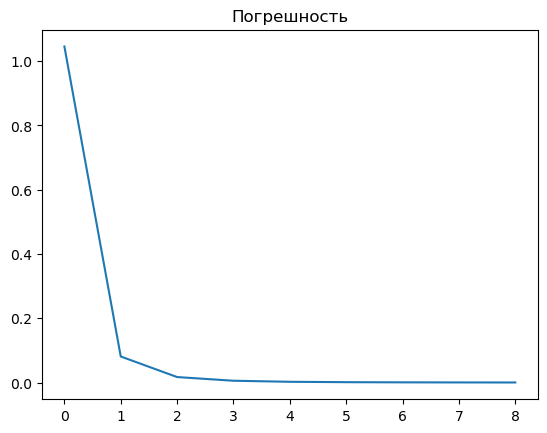

In [18]:
plt.plot(errors)
plt.title('Погрешность')
None

## Процесс Эйткена

In [19]:
from math import log as ln

In [20]:
eps = 1e-6

L = 2
k = 1

s1, s2, s3 = skf(k), skf(L * k), skf(L**2 * k)

tmp = (s3 - s2) / (s2 - s1)

m = -ln(tmp) / ln(L)
m

3.676380746413457

## Метод Ричардсона

In [70]:
h = 1/2*(b - a) / L**2
k = 2
hs = [h, h/2]
h /= 2
eps = 1e-5

while True:
    H = [
        [hs[i]**j for i in range(k)] for j in range(m, m + k - 1)
    ]
    H.append([1] * (k))
    H = np.array(H)
    
    S = np.array([skf_h(hs[i]) for i in range(k)])
    
    Cj = np.linalg.solve(H.T, S.T)
    h_last = Cj[:-1]
    r = Cj[:-1] @ np.array([h**j for j in range(m, m + k - 1)])
    
    if abs(r) <= eps:
        break
        
    k += 1
    h /= 2
    hs.append(h)

h_opt = hs[-1]
h_opt

0.024999999999999994

In [72]:
actual = quad(fp, a, b)[0]
res = skf_h(h_opt)
err = abs(actual - res)

print(f'Result: {res:.4f}; Погрешность: {err:.9f}')

Result: 32.2195; Погрешность: 0.000001967


## Метод Рунге

In [ ]:
eps = 1e-6

m = math.ceil(3.676380746413457)
L = 2
k = 1

s1, s2 = skf(k), skf(k * L)

r1 = (s2 - s1) / (1 - L**(-m))
r2 = (s2 - s1) / (L**m - 1)

h_opt = (b - a) / k * (eps/abs(r1))**(1/m) # оптимальная длина h
k_opt = math.ceil((b - a) / h_opt) # соответствующее h_opt кол-во отрезков разбиения

h_opt, k_opt

(0.025120872706142244, 32)